https://newtechaudit.ru/gruppirovka-klasterizaczia/

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [2]:
import pandas as pd
from sklearn.datasets import make_blobs

data, pregenerated = make_blobs(1000,n_features=5,cluster_std=4)
result_df = pd.DataFrame(data)

0    334
2    333
1    333
dtype: int64

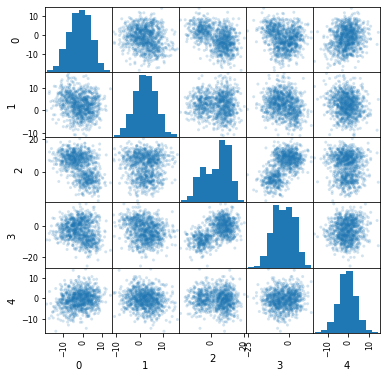

In [3]:
from pandas.plotting import scatter_matrix

scatter_matrix(result_df, alpha=0.2, figsize=(6, 6), )
pd.Series(pregenerated).value_counts()

In [4]:
result_df.columns = ["каталог","доставка","о нас","реклама","адреса"]
result_df["группа"] = pregenerated
result_df.head()

каталог   доставка      о нас    реклама    адреса  группа
0 -11.532515  10.754183  10.174358  -6.029333 -0.492922       0
1   7.077858  -2.776426  -5.877872 -15.852698  0.411424       2
2   7.010976   4.861708  -5.841896 -10.349874  1.230317       2
3   7.312815  -2.177185  -6.958583 -10.900271  2.579974       2
4   0.898065  -1.054874  -4.635169 -14.879334 -5.766111       2

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(data)

In [6]:
result_df["предсказанные"] = kmeans.labels_
print(result_df["группа"].value_counts())
print(result_df["предсказанные"].value_counts())
result_df.head()

0    334
2    333
1    333
Name: группа, dtype: int64
0    351
1    335
2    314
Name: предсказанные, dtype: int64


каталог   доставка      о нас    реклама    адреса  группа  предсказанные
0 -11.532515  10.754183  10.174358  -6.029333 -0.492922       0              2
1   7.077858  -2.776426  -5.877872 -15.852698  0.411424       2              1
2   7.010976   4.861708  -5.841896 -10.349874  1.230317       2              1
3   7.312815  -2.177185  -6.958583 -10.900271  2.579974       2              1
4   0.898065  -1.054874  -4.635169 -14.879334 -5.766111       2              1

In [7]:
temp = result_df["предсказанные"].map({2:0,0:1,1:2}) - result_df["группа"]
temp.value_counts(normalize=True)

 0    0.925
 1    0.044
-1    0.024
 2    0.004
-2    0.003
dtype: float64

In [8]:
tsne_data = (data - data.mean())/data.std()
tsne_df = TSNE(n_components=2,perplexity=20).fit_transform(tsne_data)
result_df["tsneX"] = tsne_df[:,0]
result_df["tsneY"] = tsne_df[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


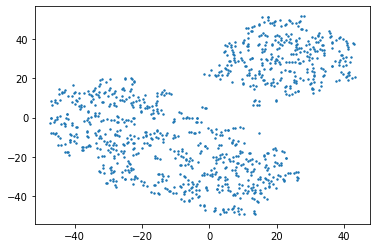

In [9]:

plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,) 
plt.savefig("blobs_gray.jpg",dpi=1200,transparent=True)

In [10]:

result_df[(result_df['tsneX']>15) & (result_df['tsneY']<5)]["группа"].value_counts()

0    55
2     2
1     1
Name: группа, dtype: int64

In [11]:
def colorer(row,column):
    if row[column] == 1:
        return "Green"
    if row[column] == 2:
        return "Brown"    
    return "Magenta"

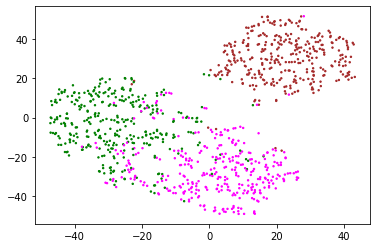

In [12]:
result_df["цвет"] = result_df.apply(colorer,axis = 1,column = "группа")
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,c=list(result_df['цвет'])) 
plt.savefig("blobs_colored.jpg",dpi=1200,transparent=True)

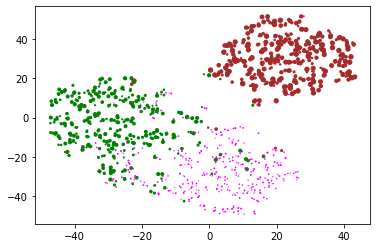

In [13]:
result_df["активность"] = np.random.randint(1,10, len(result_df))*(result_df["группа"]+0.1)
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=list(result_df['активность']),c=list(result_df['цвет'])) 
plt.savefig("blobs_size.jpg",dpi=1200,transparent=True)

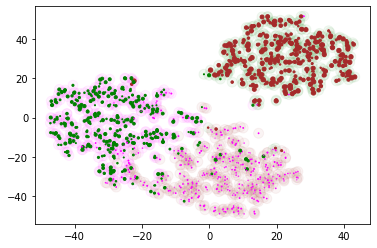

In [14]:
result_df["фон"] = result_df.apply(colorer,axis = 1,column = "предсказанные")
plt.scatter(result_df["tsneX"], result_df["tsneY"],s = 100, c=list(result_df['фон'])
                ,marker = "o",alpha = 0.05)
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=list(result_df['активность']),c=list(result_df['цвет'])) 
plt.savefig("blobs_background.jpg",dpi=1200,transparent=True)

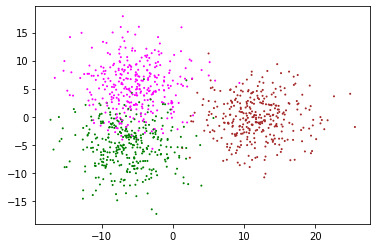

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
result_df['pcaX']  = principalComponents[:,0]
result_df['pcaY']  = principalComponents[:,1]
plt.scatter(result_df['pcaX'] , result_df['pcaY'],s = 1, c=list(result_df['цвет']),marker = "o",)
plt.show()

In [16]:
result_df.head(50)

каталог   доставка      о нас    реклама     адреса  группа  \
0  -11.532515  10.754183  10.174358  -6.029333  -0.492922       0   
1    7.077858  -2.776426  -5.877872 -15.852698   0.411424       2   
2    7.010976   4.861708  -5.841896 -10.349874   1.230317       2   
3    7.312815  -2.177185  -6.958583 -10.900271   2.579974       2   
4    0.898065  -1.054874  -4.635169 -14.879334  -5.766111       2   
5   -7.876146   9.982881  15.792135   2.173219  -6.431722       0   
6   -5.802522   5.091856   5.605597  -3.051936 -10.853347       0   
7  -11.507581   1.685127  10.751468  -1.753835  -7.564197       0   
8    5.356137  -4.279631   5.410752  -3.387547  -0.534416       1   
9   -2.426243  -3.331641   9.373822  -1.517482   0.945234       1   
10   1.398172   2.722801  -9.318052  -3.842941   5.153381       2   
11   1.190974  -0.097491  -4.868504  -5.612712   1.868151       2   
12   2.362504   3.328080  10.668536   3.236778   1.200680       1   
13  -4.321625   9.570712  17.010683  -2.435645  -3.683328       0   
14   3.787612  -7.862238   1.894681   7.892444   5.706704       1   
15  -6.785103   7.426024   4.971392   3.797350   1.814125       0   
16  -5.538513   4.158553   9.671777  -2.951325  -0.002224       0   
17  -3.866720   1.890681   1.754984   0.737080  -3.761562       1   
18  -4.974817   2.243834  14.122510   0.665501   4.558429       0   
19  -4.683746   0.124292  13.094642  -3.276933   0.307938       0   
20   0.744269  -5.448237   8.274513   5.231831  -5.103498       1   
21   3.290792   1.293583  -5.185194 -16.877760   4.486194       2   
22  -3.106015   5.593212  -8.209779  -6.931894   7.525697       2   
23  -6.598590   4.986207   7.930508  -3.744213  -0.209513       0   
24  -5.612142   6.783625   7.126724   0.099252  -3.853545       1   
25   5.722027  -2.552688   1.046223 -10.003832   9.252359       2   
26  -2.252458  -3.085592   5.084949   3.705808   1.793926       1   
27   6.491434  -2.405092  -9.170505  -1.026823  -7.491337       2   
28   8.315464   1.775696  -4.649897 -10.194430  -5.252085       2   
29   7.366198   7.637562  10.824973   6.679902   4.100225       1   
30  -0.188829  -5.107794  10.018903  10.729592  -5.595109       1   
31   3.354593   1.469092   9.410460  -1.696983  -8.891341       0   
32   6.537768   3.178606   5.272701   8.039087   3.846626       1   
33 -12.746614   2.563071  13.346925  -8.155010  -3.004716       0   
34 -11.854119   2.654647   1.304596   8.844423  -1.019448       1   
35   2.867815   1.743633  14.333500  -4.898569  -8.968842       0   
36   3.488659   2.388038   1.702296   1.633616  -1.884612       1   
37  -2.328481   0.693743   3.826517  -0.746313   6.486358       1   
38   6.543633   8.941186   5.756513  -3.122162   0.850011       1   
39  -0.660863  -3.332427  -3.435862 -14.363620  -2.861050       2   
40  -0.867407  -5.015763  10.449660   5.108632   2.011226       1   
41  -3.650625   8.128036  10.398113   2.830776   2.153227       1   
42  -7.882518  -6.731817  12.784049   4.255576  -2.556345       1   
43   8.054916   1.625651  -5.656389  -5.490629   3.235588       2   
44   1.824642   4.932192  -5.736215  -8.938072   0.564275       2   
45   4.733840  -2.147857   9.440294   2.674036  -1.983171       1   
46   3.588871   2.097473   9.616332  -0.156546   0.929568       1   
47   8.249554   4.215180   4.817202   1.173591  -3.040243       1   
48   0.306683   4.502700   7.972755   6.544441   0.768911       1   
49   2.610051  10.079894  -7.769936  -8.231501   6.794540       2   

    предсказанные      tsneX      tsneY     цвет  активность      фон  \
0               2  17.728910 -34.829926  Magenta         0.6    Brown   
1               1  32.911861  39.342052    Brown         6.3    Green   
2               1  25.785069  39.326511    Brown         4.2    Green   
3               1  32.190155  41.563957    Brown         8.4    Green   
4               1  26.750998  48.933319    Brown        10.5    Green   
5               2  -3.093248 -40.023479  Magenta